In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt # Import for plotting

Processing i = 0.1
  R^2 Score: 0.9684
  Coefficient (X_combined[0]): -11.4504
  Intercept: 12.4148
Processing i = 0.2
  R^2 Score: 0.9413
  Coefficient (X_combined[0]): -11.2952
  Intercept: 12.4209
Processing i = 0.3
  R^2 Score: 0.9132
  Coefficient (X_combined[0]): -10.9147
  Intercept: -1.2110
Processing i = 0.4
  R^2 Score: 0.9060
  Coefficient (X_combined[0]): -11.2992
  Intercept: 12.5647
Processing i = 0.5
  R^2 Score: 0.8671
  Coefficient (X_combined[0]): -10.6781
  Intercept: 11.6487
Processing i = 0.6
  R^2 Score: 0.8571
  Coefficient (X_combined[0]): -10.6894
  Intercept: -9.6324
Processing i = 0.7
  R^2 Score: 0.8216
  Coefficient (X_combined[0]): -10.6870
  Intercept: 11.3771
Processing i = 0.8
  R^2 Score: 0.8382
  Coefficient (X_combined[0]): -10.8515
  Intercept: 12.1980
Processing i = 0.9
  R^2 Score: 0.7797
  Coefficient (X_combined[0]): -10.4561
  Intercept: 11.0189
Processing i = 1.0
  R^2 Score: 0.7739
  Coefficient (X_combined[0]): -10.4726
  Intercept: 11.7334


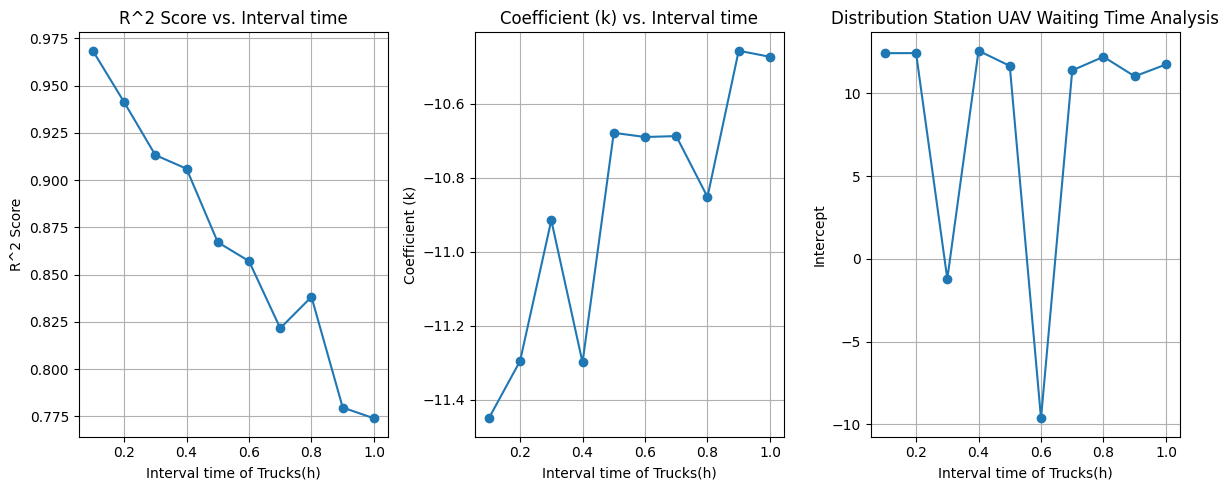

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt # Import for plotting

r2list = []
klist = []
interceptlist = []

for i in np.linspace(0.1, 1, 10):
    print(f"Processing i = {np.round(i,1)}")
    # Assuming these files exist in your directory
    p1 = np.load(f'dbm1_{np.round(i,1)}.npz') 
    X_combined = p1['X_combined']
    ilits = np.repeat(i, 500).reshape(500, 1)
    X_combined = np.hstack((X_combined, ilits))
    uavwait = p1['uavwaitinglist'].reshape(500, 1)
    degree = 1 

    model_uav = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model_uav.fit(X_combined, uavwait)

    r2 = model_uav.score(X_combined, uavwait)
    linear_regression_model_uav = model_uav.named_steps['linearregression']
    coef = linear_regression_model_uav.coef_[0][1] # Assuming degree 1 and you care about the first feature
    intercept = linear_regression_model_uav.intercept_[0]
    
    print(f"  R^2 Score: {r2:.4f}")
    print(f"  Coefficient (X_combined[0]): {coef:.4f}")
    print(f"  Intercept: {intercept:.4f}")

    r2list.append(r2)
    klist.append(coef)
    interceptlist.append(intercept)

print("\n--- Summary of Results Across i values ---")
print(f"R^2 Scores: {r2list}")
print(f"Coefficients (k): {klist}")
print(f"Intercepts: {interceptlist}")

# Optional: Plotting to visualize trends
i_values = np.linspace(0.1, 1, 10)



plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.plot(i_values, r2list, marker='o')
plt.title('R^2 Score vs. Interval time')
plt.xlabel('Interval time of Trucks(h)')
plt.ylabel('R^2 Score')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(i_values, klist, marker='o')
plt.title('Coefficient (k) vs. Interval time')
plt.xlabel('Interval time of Trucks(h)')
plt.ylabel('Coefficient (k)')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(i_values, interceptlist, marker='o')
plt.title('Intercept vs. Interval time')
plt.xlabel('Interval time of Trucks(h)')
plt.ylabel('Intercept')
plt.grid(True)
plt.title('Distribution Station UAV Waiting Time Analysis')
plt.tight_layout()
plt.show()

In [2]:


X_combined_w = np.zeros((500*10, 2))
uavwaitlist = np.zeros((500*10, 1))
waitlist = np.zeros((500*10, 1))






for num,i in enumerate(np.linspace(0.1, 1, 10)):
    print(f"Processing i = {np.round(i,1)}")
    # Assuming these files exist in your directory
    p1 = np.load(f'dbm1_{np.round(i,1)}.npz') 
    X_combined = p1['X_combined']
    ilits = np.repeat(i, 500).reshape(500, 1)
    
    waitl = p1['db1mlist'].reshape(500, 1)
    waitlist[(num*500):(num+1)*500, :] = waitl
    X_combined = np.hstack((X_combined, ilits))
    X_combined_w[(num*500):(num+1)*500, :] = X_combined
    
    uavwait = p1['uavwaitinglist'].reshape(500, 1)
    uavwaitlist[(num*500):(num+1)*500, :] = uavwait
    degree = 1 

    model_uav = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model_uav.fit(X_combined, uavwait)

    r2 = model_uav.score(X_combined, uavwait)
    linear_regression_model_uav = model_uav.named_steps['linearregression']
    coef = linear_regression_model_uav.coef_[0][1] # Assuming degree 1 and you care about the first feature
    intercept = linear_regression_model_uav.intercept_[0]

    print(f"  R^2 Score: {r2:.4f}")
    print(f"  Coefficient (X_combined[0]): {coef:.4f}")
    print(f"  Intercept: {intercept:.4f}")

    
    
    r2list.append(r2)
    klist.append(coef)
    interceptlist.append(intercept)

Processing i = 0.1
  R^2 Score: 0.9684
  Coefficient (X_combined[0]): -11.4504
  Intercept: 12.4148
Processing i = 0.2
  R^2 Score: 0.9413
  Coefficient (X_combined[0]): -11.2952
  Intercept: 12.4209
Processing i = 0.3
  R^2 Score: 0.9132
  Coefficient (X_combined[0]): -10.9147
  Intercept: -1.2110
Processing i = 0.4
  R^2 Score: 0.9060
  Coefficient (X_combined[0]): -11.2992
  Intercept: 12.5647
Processing i = 0.5
  R^2 Score: 0.8671
  Coefficient (X_combined[0]): -10.6781
  Intercept: 11.6487
Processing i = 0.6
  R^2 Score: 0.8571
  Coefficient (X_combined[0]): -10.6894
  Intercept: -9.6324
Processing i = 0.7
  R^2 Score: 0.8216
  Coefficient (X_combined[0]): -10.6870
  Intercept: 11.3771
Processing i = 0.8
  R^2 Score: 0.8382
  Coefficient (X_combined[0]): -10.8515
  Intercept: 12.1980
Processing i = 0.9
  R^2 Score: 0.7797
  Coefficient (X_combined[0]): -10.4561
  Intercept: 11.0189
Processing i = 1.0
  R^2 Score: 0.7739
  Coefficient (X_combined[0]): -10.4726
  Intercept: 11.7334


Processing i = 0.1
Processing i = 0.2
Processing i = 0.3
Processing i = 0.4
Processing i = 0.5
Processing i = 0.6
Processing i = 0.7
Processing i = 0.8
Processing i = 0.9
Processing i = 1.0


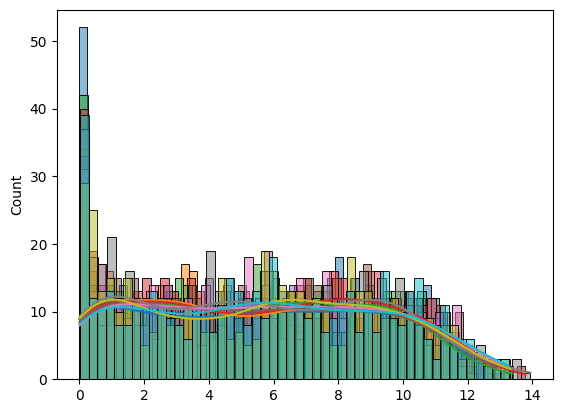

In [3]:
import seaborn as sns
for num,i in enumerate(np.linspace(0.1, 1, 10)):
    print(f"Processing i = {np.round(i,1)}")
    # Assuming these files exist in your directory
    p1 = np.load(f'dbm1_{np.round(i,1)}.npz') 
    waitlist = p1['uavwaitinglist'].reshape(500, )
    sns.histplot(x=waitlist, bins=50, kde=True)

Processing i = 0.1
Processing i = 0.2
Processing i = 0.3
Processing i = 0.4
Processing i = 0.5
Processing i = 0.6
Processing i = 0.7
Processing i = 0.8
Processing i = 0.9
Processing i = 1.0


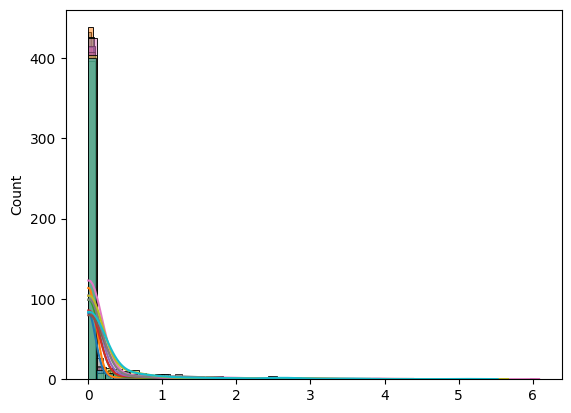

In [4]:
import seaborn as sns
for num,i in enumerate(np.linspace(0.1, 1, 10)):
    print(f"Processing i = {np.round(i,1)}")
    # Assuming these files exist in your directory
    p1 = np.load(f'dbm1_{np.round(i,1)}.npz') 
    waitlist = p1['db1mlist'].reshape(500, )
    sns.histplot(x=waitlist, bins=50, kde=True)

In [8]:


X_combined_w = np.zeros((500*10, 2))
uavwaitlist = np.zeros((500*10, 1))
waitlist = np.zeros((500*10, 1))






for num,i in enumerate(np.linspace(0.1, 1, 10)):
    print(f"Processing i = {np.round(i,1)}")
    # Assuming these files exist in your directory
    p1 = np.load(f'dbm1_{np.round(i,1)}.npz') 
    X_combined = p1['X_combined']
    ilits = np.repeat(i, 500).reshape(500, 1)
    
    waitl = p1['db1mlist'].reshape(500, 1)
    waitlist[(num*500):(num+1)*500, :] = waitl
    X_combined = np.hstack((X_combined, ilits))
    X_combined_w[(num*500):(num+1)*500, :] = X_combined
    
    uavwait = p1['uavwaitinglist'].reshape(500, 1)
    uavwaitlist[(num*500):(num+1)*500, :] = uavwait
    degree = 1 

    model_uav = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model_uav.fit(X_combined, uavwait)

    r2 = model_uav.score(X_combined, uavwait)
    linear_regression_model_uav = model_uav.named_steps['linearregression']
    coef = linear_regression_model_uav.coef_[0][1] # Assuming degree 1 and you care about the first feature
    intercept = linear_regression_model_uav.intercept_[0]

    print(f"  R^2 Score: {r2:.4f}")
    print(f"  Coefficient (X_combined[0]): {coef:.4f}")
    print(f"  Intercept: {intercept:.4f}")

    
    
    r2list.append(r2)
    klist.append(coef)
    interceptlist.append(intercept)

Processing i = 0.1
  R^2 Score: 0.9684
  Coefficient (X_combined[0]): -11.4504
  Intercept: 12.4148
Processing i = 0.2
  R^2 Score: 0.9413
  Coefficient (X_combined[0]): -11.2952
  Intercept: 12.4209
Processing i = 0.3
  R^2 Score: 0.9132
  Coefficient (X_combined[0]): -10.9147
  Intercept: -1.2110
Processing i = 0.4
  R^2 Score: 0.9060
  Coefficient (X_combined[0]): -11.2992
  Intercept: 12.5647
Processing i = 0.5
  R^2 Score: 0.8671
  Coefficient (X_combined[0]): -10.6781
  Intercept: 11.6487
Processing i = 0.6
  R^2 Score: 0.8571
  Coefficient (X_combined[0]): -10.6894
  Intercept: -9.6324
Processing i = 0.7
  R^2 Score: 0.8216
  Coefficient (X_combined[0]): -10.6870
  Intercept: 11.3771
Processing i = 0.8
  R^2 Score: 0.8382
  Coefficient (X_combined[0]): -10.8515
  Intercept: 12.1980
Processing i = 0.9
  R^2 Score: 0.7797
  Coefficient (X_combined[0]): -10.4561
  Intercept: 11.0189
Processing i = 1.0
  R^2 Score: 0.7739
  Coefficient (X_combined[0]): -10.4726
  Intercept: 11.7334


In [9]:
X_combined_w_y = np.hstack((X_combined_w, waitlist.reshape(-1, 1)))
X_combined_w_y.shape

(5000, 3)

In [10]:
import numpy as np
import pandas as pd # 方便数据处理和展示

# 继续使用上面的 X_combined_w_y 模拟数据

# 您提供的分段点
bins = [0.0] + [0.5, 0.6, 0.7, 0.8, 0.9, 1.0] # 添加 0.0 作为起始点，确保覆盖所有数据
# 或者如果您只想分析 >=0.5 的部分，可以调整 bins

print("\n--- 分段平均值分析 ---")

# 存储每个区间的平均值
bin_means = {}

# 存储比率变化
change_ratios = {}

# 将数据按第一列排序，以便更好地理解区间
X_combined_w_y_sorted = X_combined_w_y[X_combined_w_y[:, 0].argsort()]

# 迭代分段点
for i in range(len(bins) - 1):
    lower_bound = bins[i]
    upper_bound = bins[i+1]

    # 筛选出当前区间的数据
    # 使用包含下限，不包含上限的方式 [lower, upper)
    # 最后一个区间包含上限 [0.9, 1.0]
    if i == len(bins) - 2: # 最后一个区间
        subset_data = X_combined_w_y_sorted[
            (X_combined_w_y_sorted[:, 0] >= lower_bound) &
            (X_combined_w_y_sorted[:, 0] <= upper_bound)
        ]
    else:
        subset_data = X_combined_w_y_sorted[
            (X_combined_w_y_sorted[:, 0] >= lower_bound) &
            (X_combined_w_y_sorted[:, 0] < upper_bound)
        ]

    # 确保子集非空
    if subset_data.shape[0] > 0:
        current_mean = subset_data[:, -1].mean()
        bin_means[f"{lower_bound}-{upper_bound}"] = current_mean
        print(f"区间 [{lower_bound:.1f}, {upper_bound:.1f}) 的平均值: {current_mean:.4f} (样本数: {subset_data.shape[0]})")
    else:
        bin_means[f"{lower_bound}-{upper_bound}"] = np.nan # 如果没有数据，设为 NaN
        print(f"区间 [{lower_bound:.1f}, {upper_bound:.1f}) 无数据。")


# 计算相邻区间的平均值变化 Ratio
print("\n--- 平均值变化 Ratio ---")
mean_values = list(bin_means.values())
mean_keys = list(bin_means.keys())

max_ratio = -1.0
max_ratio_segment = ""

for i in range(len(mean_values) - 1):
    val1 = mean_values[i]
    val2 = mean_values[i+1]
    segment1 = mean_keys[i]
    segment2 = mean_keys[i+1]

    if pd.notna(val1) and pd.notna(val2) and val1 != 0: # 确保值有效且分母不为0
        # 计算比率 (val2 / val1)
        ratio = val2 / val1
        change_ratios[f"从 {segment1} 到 {segment2}"] = ratio
        print(f"平均值从 {segment1} 到 {segment2} 的比率变化: {ratio:.4f}")

        # 找到最大的比率 (绝对值最大的变化率)
        if abs(ratio) > max_ratio: # 或者 abs(ratio - 1) 来衡量远离1的程度
            max_ratio = abs(ratio)
            max_ratio_segment = f"从 {segment1} 到 {segment2}"
    else:
        print(f"无法计算从 {segment1} 到 {segment2} 的比率变化 (数据不足或为零)。")

if max_ratio_segment:
    print(f"\n平均值变化 Ratio 最大的分段是: {max_ratio_segment}, Ratio: {max_ratio:.4f}")
else:
    print("\n未能找到有效的最大比率变化。")


--- 分段平均值分析 ---
区间 [0.0, 0.5) 的平均值: 0.0005 (样本数: 2100)
区间 [0.5, 0.6) 的平均值: 0.0073 (样本数: 500)
区间 [0.6, 0.7) 的平均值: 0.0225 (样本数: 500)
区间 [0.7, 0.8) 的平均值: 0.0600 (样本数: 400)
区间 [0.8, 0.9) 的平均值: 0.1873 (样本数: 500)
区间 [0.9, 1.0) 的平均值: 0.4351 (样本数: 500)

--- 平均值变化 Ratio ---
平均值从 0.0-0.5 到 0.5-0.6 的比率变化: 15.9835
平均值从 0.5-0.6 到 0.6-0.7 的比率变化: 3.0870
平均值从 0.6-0.7 到 0.7-0.8 的比率变化: 2.6617
平均值从 0.7-0.8 到 0.8-0.9 的比率变化: 3.1231
平均值从 0.8-0.9 到 0.9-1.0 的比率变化: 2.3231

平均值变化 Ratio 最大的分段是: 从 0.0-0.5 到 0.5-0.6, Ratio: 15.9835


--- 重新计算分段平均值 ---
区间 [0.0, 0.5) 的平均值: 0.0005 (样本数: 2100)
区间 [0.5, 0.6) 的平均值: 0.0073 (样本数: 500)
区间 [0.6, 0.7) 的平均值: 0.0225 (样本数: 500)
区间 [0.7, 0.8) 的平均值: 0.0600 (样本数: 400)
区间 [0.8, 0.9) 的平均值: 0.1873 (样本数: 500)
区间 [0.9, 1.0) 的平均值: 0.4351 (样本数: 500)


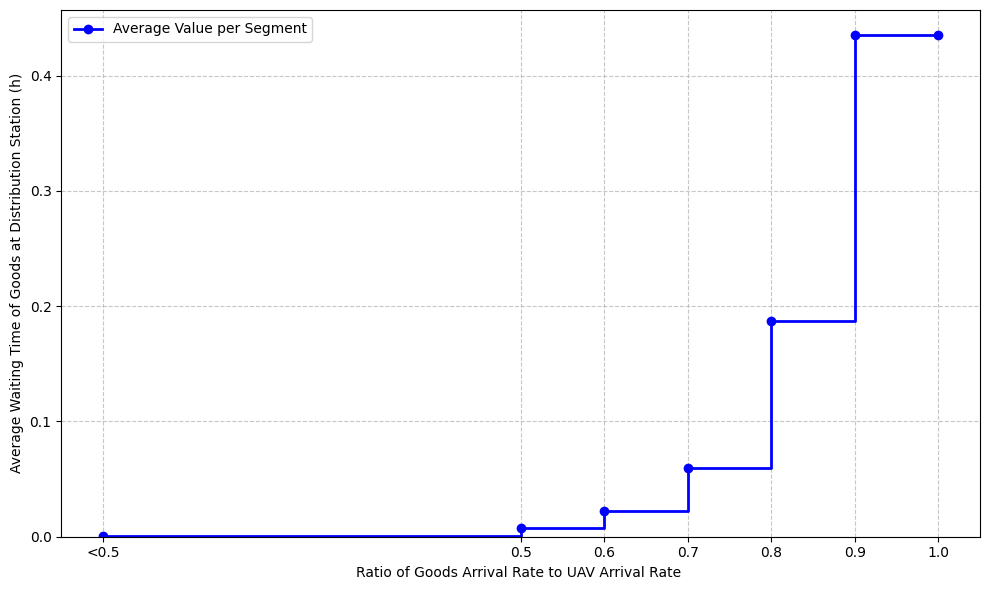


--- 分段平均值分析完成 ---
[0.00045666931217752676, 0.007299190554930361, 0.022532684270061394, 0.05997439712262835, 0.1873069810922462, 0.43513171924427196]


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker # 用于更精细的刻度控制


bins = [0.0, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

print("--- 重新计算分段平均值 ---")




plot_x_values = [] # 用于阶梯图的X坐标 (区间的右边界)
plot_y_values = [] # 用于阶梯图的Y坐标 (区间的平均值)
segment_labels = [] # 用于打印输出

# 将数据按第一列排序 (虽然对于平均值计算不是必须，但对理解数据有帮助)
X_combined_w_y_sorted = X_combined_w_y[X_combined_w_y[:, 0].argsort()]
current_meanlist = []
for i in range(len(bins) - 1):
    lower_bound = bins[i]
    upper_bound = bins[i+1]

    # 筛选出当前区间的数据
    # 注意：最后一个区间包含上限，其他区间不包含上限
    if i == len(bins) - 2: # 最后一个区间 (例如 [0.9, 1.0])
        subset_data = X_combined_w_y_sorted[
            (X_combined_w_y_sorted[:, 0] >= lower_bound) &
            (X_combined_w_y_sorted[:, 0] <= upper_bound)
        ]
    else: # 其他区间 (例如 [0.0, 0.5), [0.5, 0.6) 等)
        subset_data = X_combined_w_y_sorted[
            (X_combined_w_y_sorted[:, 0] >= lower_bound) &
            (X_combined_w_y_sorted[:, 0] < upper_bound)
        ]

    if subset_data.shape[0] > 0:
        current_mean = subset_data[:, -1].mean()
        current_meanlist.append(current_mean)
        plot_x_values.append(upper_bound) # X轴使用区间的右边界
        plot_y_values.append(current_mean)
        segment_labels.append(f"[{lower_bound:.1f}, {upper_bound:.1f})")
        print(f"区间 [{lower_bound:.1f}, {upper_bound:.1f}) 的平均值: {current_mean:.4f} (样本数: {subset_data.shape[0]})")
    else:
        # 如果某个区间没有数据，可以在图上显示为0或者留空，这里我们跳过，不画这个点
        print(f"区间 [{lower_bound:.1f}, {upper_bound:.1f}) 无数据。")

# --- 绘制阶梯图 ---
plt.figure(figsize=(10, 6))




x_for_plot = [bins[0]] + plot_x_values[:-1] # 从第一个bin的下界开始
y_for_plot = plot_y_values

# 添加最后一个点，以完成最后一个阶梯
x_for_plot.append(bins[-1])
y_for_plot.append(plot_y_values[-1])


plt.step(x_for_plot, y_for_plot, where='post', color='blue', linestyle='-', linewidth=2, marker='o', markersize=6, label='Average Value per Segment')

# 添加标签和标题
plt.xlabel('Ratio of Goods Arrival Rate to UAV Arrival Rate ')
plt.ylabel('Average Waiting Time of Goods at Distribution Station (h)')
# plt.title('Simulation results of Stepwise Average Waiting Time of Gods at Distribution Station')
plt.grid(True, linestyle='--', alpha=0.7)




plt.xticks(bins, [f'<{bins[1]:.1f}'] + [f'{b:.1f}' for b in bins[1:]])




plt.ylim(bottom=0)

plt.legend()
plt.tight_layout()
plt.show()
print("\n--- 分段平均值分析完成 ---")
print(current_meanlist)